# Data Science Regression Project : Home Price Prediction

## Reading and exploring the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,30)

In [3]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Data Cleaning

In [6]:
df.duplicated().any()

True

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().any()

False

In [9]:
df.isnull().any()

area_type       False
availability    False
location         True
size             True
society          True
total_sqft      False
bath             True
balcony          True
price           False
dtype: bool

In [10]:
df["area_type"].value_counts()

Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: area_type, dtype: int64

In [11]:
df.groupby("area_type").agg("count")

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2398,2398,2398,1209,2398,2390,2290,2398
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,1989,1989,1973,310,1989,1973,1801,1989
Super built-up Area,8317,8316,8317,5890,8317,8268,8013,8317


In [35]:
df1 = df.drop(["area_type", "availability", "society", "balcony"], axis = "columns")
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [36]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [37]:
df1.columns[df1.isna().any()]

Index(['location', 'size', 'bath'], dtype='object')

In [38]:
df1["size"] = df1["size"].fillna(method= "ffill")

In [39]:
df1.bath = df1.bath.fillna(df1.bath.mean())

In [40]:
df1["location"] = df1["location"].fillna(method= "ffill")

In [41]:
df1.isna().any()

location      False
size          False
total_sqft    False
bath          False
price         False
dtype: bool

In [42]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

## Feature Engineering

In [43]:
df1["bedroom"] = df1["size"].apply(lambda x: int(x.split(" ")[0]))

In [44]:
df1.head()

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [45]:
df1["bedroom"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [46]:
df1[df1.bedroom>20]

,location,size,total_sqft,bath,price,bedroom
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [47]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [59]:
def is_float(x):
    try:
        float(x)
    except:
        return False  
    return True

In [60]:
df1[~df1.total_sqft.apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.000000,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.708602,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.708602,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.000000,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.000000,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.000000,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.000000,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.708602,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.000000,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.000000,63.770,2


### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range.

In [61]:
def convert_tofloat(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return( float(tokens[0]) + float(tokens[1]))/2
    try: 
        return float(x)
    except:
        return None 

In [62]:
convert_tofloat("65665")

65665.0

In [63]:
convert_tofloat("1520 - 1740")

1630.0

In [64]:
df2 = df1

In [65]:
df2.total_sqft = df2.total_sqft.apply(convert_tofloat)
df2.head()

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


## Feature Engineering
### Add new feature called price per square feet

In [66]:
df3 = df2.copy()
df3["price_per_sqft"] = df3.price * 100000/ df3.total_sqft


In [67]:
df3.head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Examine locations which is a categorical variable. 

In [68]:
len(df3.location.unique())

1305

In [73]:
locations = df3.groupby("location")["location"].count().sort_values(ascending=False)
locations

location
Whitefield            524
Sarjapur  Road        380
Electronic City       289
Kanakpura Road        249
Thanisandra           232
                     ... 
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
Konappana Agrahara      1
1 Annasandrapalya       1
Name: location, Length: 1294, dtype: int64

In [71]:
df3["location"] = df3.location.apply(lambda x: x.strip())

In [74]:
len(locations[locations<=10])

1061

In [75]:
location_lessthan10 = locations[locations<=10]

## Dimensionality Reduction
#### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [76]:
df3.location = df3.location.apply(lambda x : "other" if x in location_lessthan10 else x)

In [77]:
len(df3.location.unique())

234

In [78]:
df3.head(10)

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [87]:
df3.shape

(12791, 7)

## Outlier Removal Using Business Logic
#### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bedroom apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bedroom than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [89]:
df3.head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [90]:
df3[df3.total_sqft/df3.bedroom < 300]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13221,other,9 Bedroom,1178.0,9.0,75.0,9,6366.723260
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091


In [91]:
df4 = df3[~(df3.total_sqft/df3.bedroom < 300)]
df4.head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [92]:
df4.shape

(12057, 7)

## Outlier Removal Using Standard Deviation and Mean

In [93]:
df4.price_per_sqft.describe()

count     12011.000000
mean       6363.396694
std        4226.681217
min         267.829813
25%        4250.000000
50%        5330.490405
75%        6967.569041
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [107]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df5 = remove_pps_outliers(df4)
df5.shape

(9898, 7)

#### Let's check if for a given location how does the 2 BEDROOM and 3 BEDROOM property prices look like

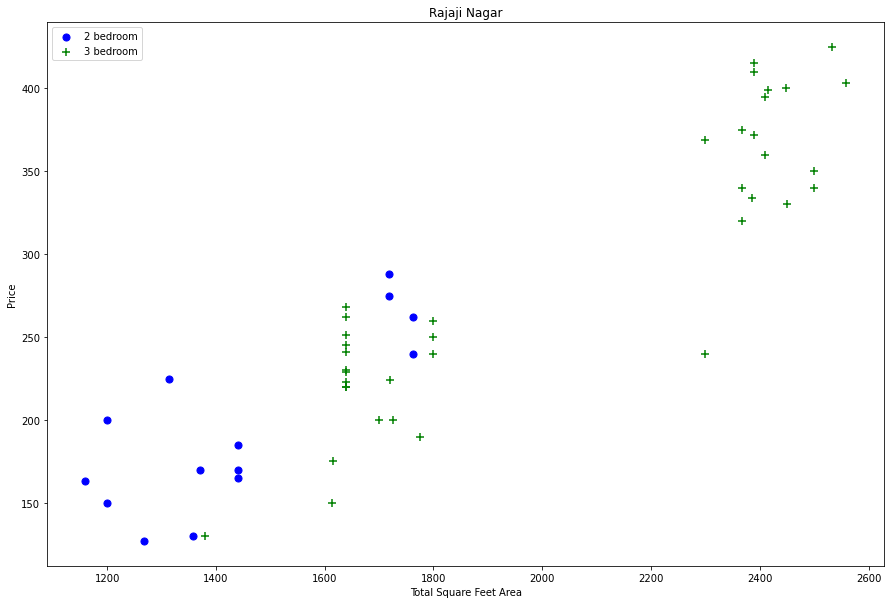

In [110]:

def plot_scatter_chart(df,location):
    bedroom2 = df[(df.location==location) & (df.bedroom==2)]
    bedroom3 = df[(df.location==location) & (df.bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bedroom2.total_sqft,bedroom2.price,color='blue',label='2 bedroom', s=50)
    plt.scatter(bedroom3.total_sqft,bedroom3.price,marker='+', color='green',label='3 bedroom', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

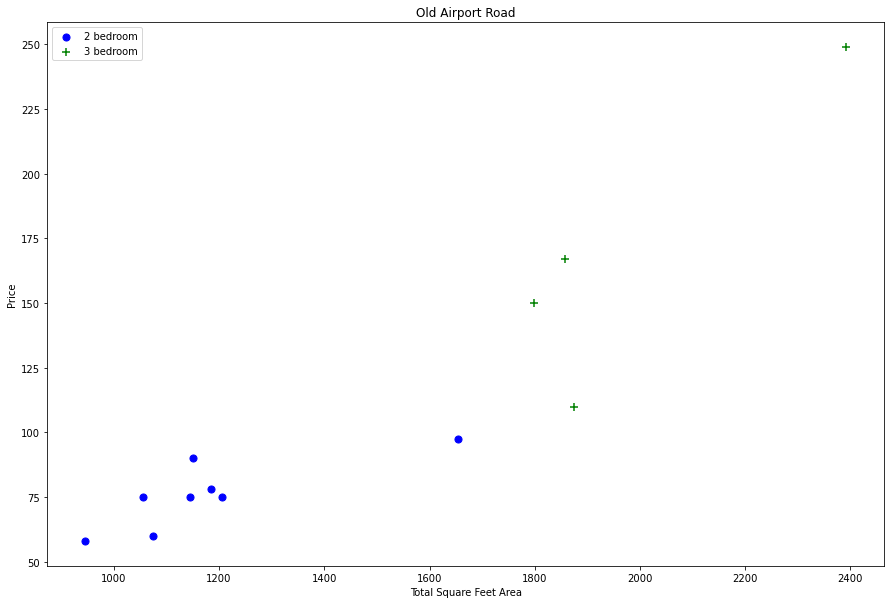

In [111]:
plot_scatter_chart(df5, "Old Airport Road")


#### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.


{

    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}


In [113]:
def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bedroom_stats = {}
        for bedroom, bedroom_df in location_df.groupby('bedroom'):
            bedroom_stats[bedroom] = {
                'mean': np.mean(bedroom_df.price_per_sqft),
                'std': np.std(bedroom_df.price_per_sqft),
                'count': bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in location_df.groupby('bedroom'):
            stats = bedroom_stats.get(bedroom-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedroom_df[bedroom_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df6 = remove_bedroom_outliers(df5)
df6.shape

(7053, 7)

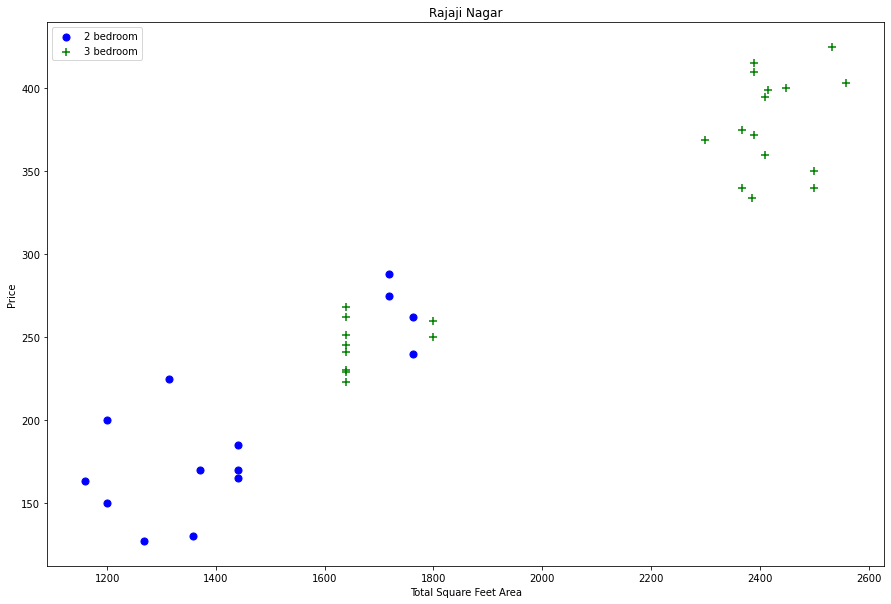

In [115]:
plot_scatter_chart(df6,"Rajaji Nagar")

Text(0, 0.5, 'Count')

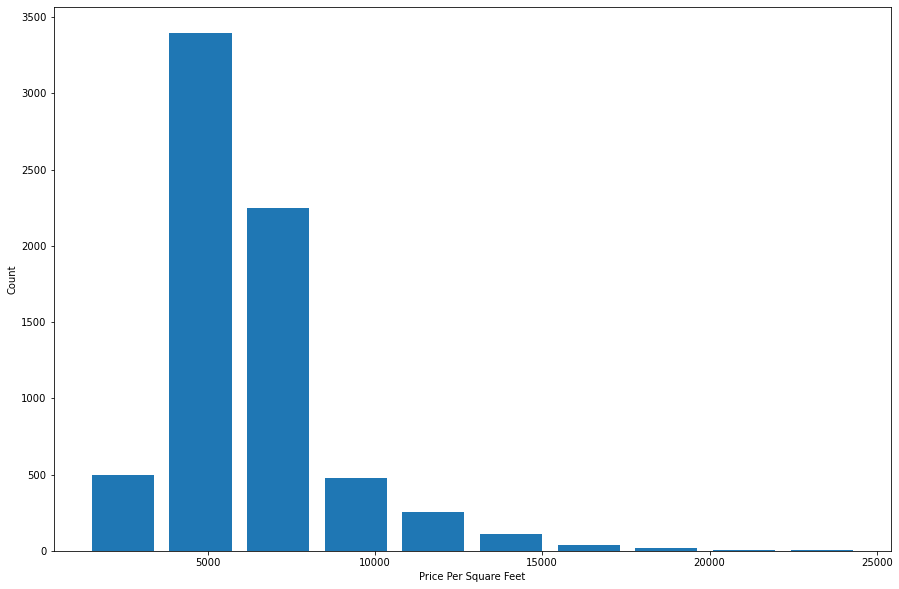

In [116]:
import matplotlib
# matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#### The histogram above exhibits a normal distribution

## Outlier Removal Using Bathroom Feature

In [117]:
df6.head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [120]:
df6.bath.unique

<bound method Series.unique of 0       4.0
1       3.0
2       2.0
3       2.0
4       2.0
       ... 
9888    2.0
9890    2.0
9891    1.0
9894    1.0
9897    5.0
Name: bath, Length: 7053, dtype: float64>

In [121]:
df6[df6.bath > 10]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
5038,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8118,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8212,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
8956,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9298,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

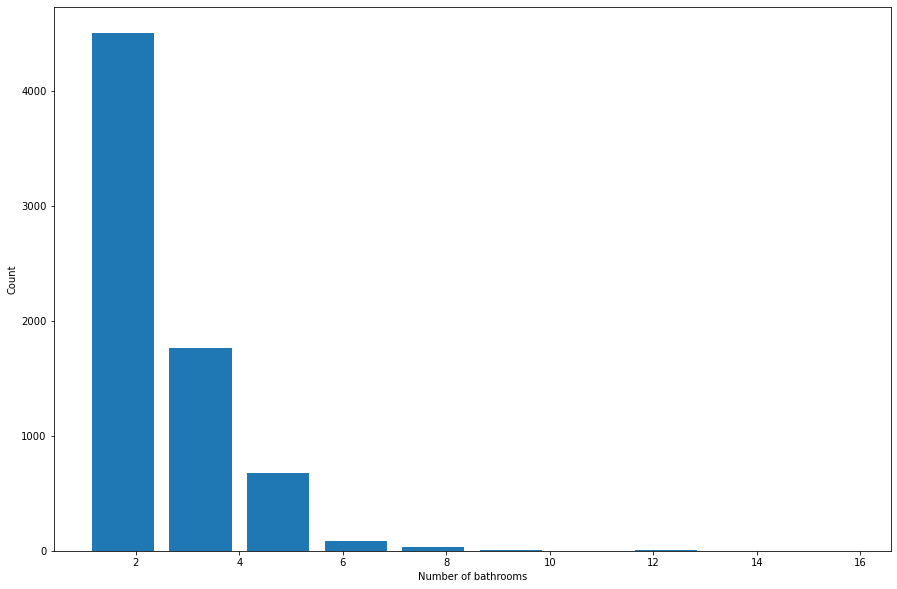

In [124]:
plt.hist(df6.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")


### Again the business manager has a conversation with you (i.e. a data scientist) that if you have a house with bathrooms 2 and above more than the number of bedrooms should be dropped. Anything above that is an outlier or a data error and can be removed

In [126]:
df7 = df6[~ (df6.bath>(df6.bedroom + 2))]

In [127]:
df7.head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


### we now drop columns we will not use for modelling

In [128]:
df8 = df7.drop(["size", "price_per_sqft"], axis = "columns")
df8.head()

,location,total_sqft,bath,price,bedroom
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## Use One Hot Encoding For Location

In [129]:
dummies = pd.get_dummies(df8.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
df9 = pd.concat([df8, dummies.drop(["other"], axis = "columns")], axis = "columns")
df9.head(3)

,location,total_sqft,bath,price,bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
df10 = df9.drop(["location"], axis = "columns")
df10.head(3)

,total_sqft,bath,price,bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
df10.shape

(7049, 237)

In [135]:
X = df10.drop(["price"], axis = "columns")
X.head(3)

,total_sqft,bath,bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
y = df10[["price"]]
y.head(3)

,price
0,428.0
1,194.0
2,235.0


In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [143]:
from sklearn.linear_model import LinearRegression
lnr_reg = LinearRegression()

In [144]:
lnr_reg.fit(X_train, y_train)
lnr_reg.score(X_test, y_test)

0.8536064257282754

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [145]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84271284, 0.86515109, 0.87278722, 0.8538424 , 0.81665335])

## Find best model using GridSearchCV

In [146]:

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [147]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.850229,{'normalize': False}
1,lasso,0.718307,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.713975,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


#### Based on above results we see that LinearRegression gives the best score. Hence we will use that.

In [153]:
X.columns

Index(['total_sqft', 'bath', 'bedroom', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=236)

In [154]:
np.where(X.columns=="2nd Stage Nagarbhavi")[0][0]

5

In [148]:
def predict_price(location,sqft,bath,bedroom):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bedroom
    if loc_index >= 0:
        x[loc_index] = 1

    return lnr_reg.predict([x])[0]

### Test the model

In [149]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

array([84.45060423])

In [150]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

array([86.21596928])

In [151]:
predict_price('Indira Nagar',1000, 2, 2)

array([172.8932608])

In [152]:
predict_price('Indira Nagar',1000, 3, 3)

array([174.65862585])

## Export the tested model to a pickle file

In [155]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lnr_reg,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [156]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))